## Steps for running a simple optimization.

### Step 0: Prepare the input file template

Replace the to-be-optimized value in the input template file with `<name>`.
```
    File_Bfield(1) = 'sole_gun.dat', S_pos(1) = 0.28
    S_smooth(1) = 5  
    MaxB(1) = <main_sole_b>
```

### Step 1: Assign system path and import modules

In [1]:
from linac_opt import LinacOpt

### Step 2: Instantiate the optimization

In [2]:
opt_test = LinacOpt(path_name='examples/astra_basic', particle_type='astra', 
                    input_file='injector.in', input_template='injector.in.000')

### Step 3: Set up the optimizer

In [3]:
opt_test.set_optimizer('sdpen')
opt_test.optimizer.setOption('alfa_stop', 1e-2)

### Step 4: Set fit-points

In [4]:
opt_test.fit_points.set_point('out', 'injector.0400.001')

### Step 5: Set objective

In [5]:
def f1(fits):
    print "Horizontal emittance: {:.4f} um".format(fits.out.emitx*1.e6)
    return fits.out.emitx*1.e6
opt_test.opt_prob.set_obj('emitx_um', f1)

### Step 6: Set constraint

In [6]:
def g1(fits):
    return fits.out.n0
opt_test.opt_prob.set_con('npar', g1, equal=500)

### Step 7: Set variables


In [7]:
opt_test.opt_prob.set_var('laser_spot', value=0.1, lower=0.04, upper=0.3)
opt_test.opt_prob.set_var('main_sole_b', value=0.1, lower=0.0, upper=0.4)

### Step 8: Run the optimization


In [8]:
opt_test.solve('astra')


********************************************************************************
Start solving the following problem with pyOpt.SDPEN on 
astra /home/jun/myscripts/linac_opt/examples/astra_basic/injector.in
********************************************************************************

Optimization Problem -- opt_prob-2017-02-14-08-53-03

Objectives:
  Name                Value        Optimum      Function        
  emitx_um             0.0000e+00  -1.0000e+21  f1              

Constraints:
  Name                Value        Bound                                           
  npar                 0.0000e+00  5.0000e+02 - 0.0000e+00 <= g1() <= 5.0000e+02 + 0.0000e+00

Variables (c - continuous, i - integer, d - discrete):
  Name                Type    Value        Lower Bound  Upper Bound
  laser_spot          c        1.0000e-01   4.0000e-02   3.0000e-01
  main_sole_b         c        1.0000e-01   0.0000e+00   4.0000e-01
 
Fit points:
  Name                File              Type    

----
# Output

**General output:**
- prob_name.log.???: History of the optimization. ??? is the No. of step.
- prob_name.sol.???: Summary of the solution.
- prob_name.sol.???.pkl: Pickle file used for starting from a intermediate step.
- input_file: The input file will be filled with the optimized parameters.

**Output from specific optimizers:**
- ALPSO: ALPSO_print.out
- SDPEN: SDPEN.out.???

----
# Postprocessing

In [4]:
from beam_plots import PhaseSpacePlot

# Instantiate a PhaseSpacePlot object
p1 = PhaseSpacePlot('examples/plots/fort.140', 'impact', 3.1e-12, cut_tail=0.1)

## Print the parameters

In [12]:
print p1

n                   charge (C)          p                   I_peak (A)      
      1.1208e+05          2.7900e-12          2.9392e+02          3.7474e+03

emitx (m)           emity (m)           Sx (m)              Sy (m)          
      2.6313e-07          3.2890e-07          2.0103e-06          2.2459e-06

betax (m)           betay (m)           alphax              alphay          
      4.5106e-03          4.4984e-03          3.4345e-01          4.4676e-01

St (m)              Sdelta              chirp (1/m)         Ct (s)          
      4.0786e-16          4.8390e-03         -2.3942e+04         -3.0239e-16

emitx_slice (m)     emity_slice         Sdelta_slice        St_slice        
      2.7072e-07          3.4221e-07          3.7868e-03          5.5801e-17

Cx (m)              Cy (m)              Cxp (rad)           Cyp (rad)       
     -2.1350e-06          4.3801e-08          8.2533e-05         -7.9861e-07

emitx_tr (m)        emity_tr (m)        Sdelta_un       
      2.6334e

In [14]:
p1.betax, p1.emitx_tr

(0.0045106152311081248, 2.6334247058634272e-07)

## Phase-space plot

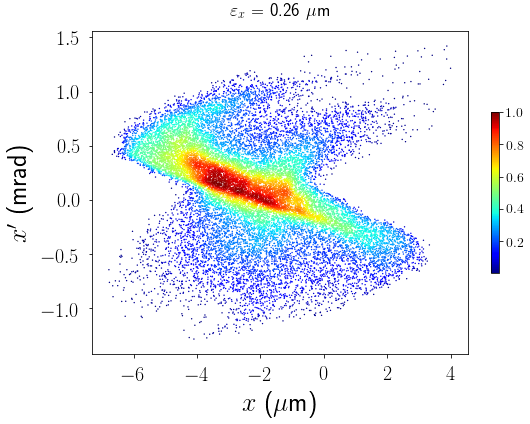

In [6]:
p1.plot('x', 'xp', x_unit='um')

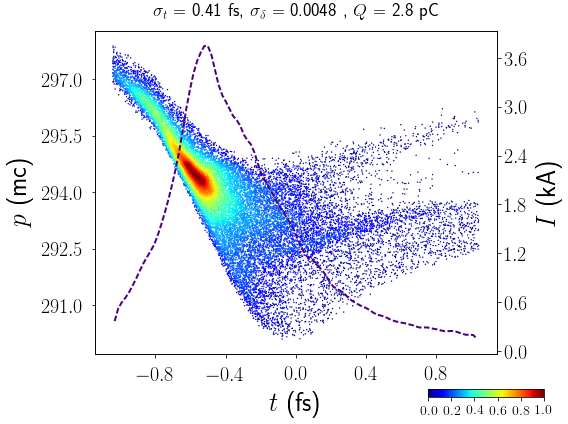

In [11]:
p1.plot('t', 'p', y1_unit='kA', bins_2d=500, sigma_2d=5)

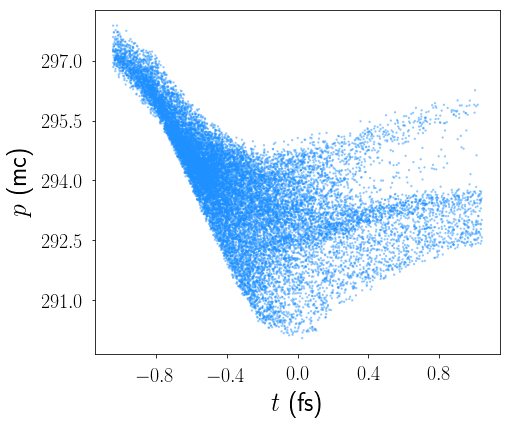

In [16]:
p1.plot('t', 'p', special=False, density_plot=False, 
        marker_color='dodgerblue', marker_size=5, alpha=0.5, figsize=(7.2, 6))

In [9]:
p1.plot('t', 'p', output='t-p.png', dpi=600)

/home/jun/myscripts/linac_opt/examples/plots/t-p.png generated.


## Line plot

In [1]:
from beam_plots import LinePlot

# Instantiate a PhaseSpacePlot object
l1 = LinePlot('examples/plots/fort', 'impact')

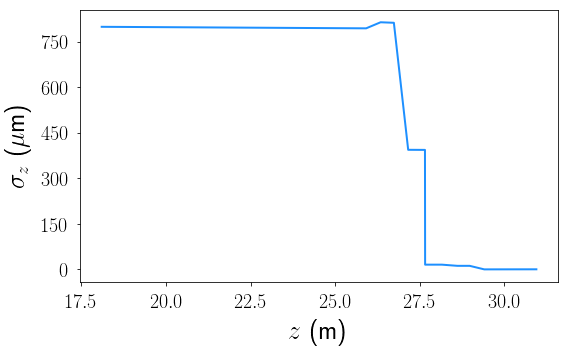

In [2]:
l1.plot('Sz')

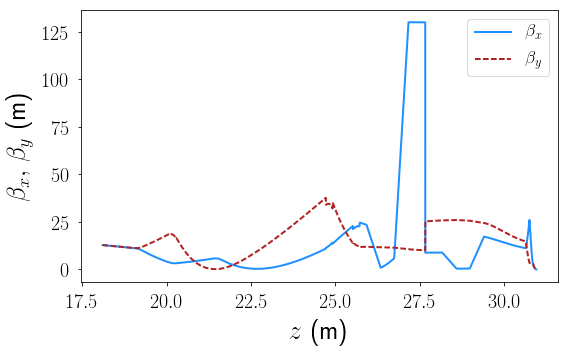

In [3]:
l1.plot(['betax', 'betay'])